# Questions théoriques

Q1. Nous pouvons estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles grâce à la loi forte des grands nombres

2. Le vecteur $Z$ contient les gaussiennes décrivant les points non observées connaissant les $n-p$ valeurs des observations. Ce vecteur doit conserver l'information sur la distance d'un point à un autre pour l'implémentation... Une fois cette considération faite on retombe sur le cas expliqué dans le cours proba 4 : La calcul des lois conditionnelles des $p$ premières composantes non-observées en fonction des $n-p$ dernières composantes observées placées dans le vecteur $V$ est aisée. La loi de probabilités des $p$ premières valeurs observées sachant les $n-p$ observées $(V=v)$ suit cette fonction de densité. 
$$
f_{Z | V=v}(y)=\frac{1}{(2 \pi)^{k / 2} \sqrt{\operatorname{det}\left(C S_{Z}\right)}}\left.\exp \left(-\frac{1}{2}(z-\psi(v))^{t} C S_{Z}^{-1}(z-\psi(v))\right)\right)
$$
QUI EST P ? QUI EST T ? ON DEVRAIT PAS PRENDRE PLUTOT X = (Z(X0), ...Z(XN), z(X0),...z(XN)) ??
Autrement dit la variable aléatoire $Z$ sachant $V=v$ suit une gaussienne d'espérance :

$$
m_{Z | V=v}=\psi(v)=m_{Z}+C_{Z, V} C_{V}^{-1}\left(v-m_{V}\right)
$$


et de matrice de covariance : 
$$
C S_{Z}=C_{Z}-C_{Z, V} C_{V}^{-1} C_{V, Z}
$$

 Q3. Avec Y un vecteur de composantes gaussiennes indépendantes, réduites (de variance 1) et centrées (d'espérance nulle) alors le vecteur Z = m + RY est gaussien comme combinaison linéaire de variable aléatoires gaussienne d'espérance m et de variance $ C=R R^t$ (matrice de covariance)

4. Considérons un vecteur Y gaussien, centré, réduit. Nous allons chercher à le transformer en un  vecteur $Z$ de loi conditionnelle correspondant aux points de discrétisation sans observation, connaissant les dernières valeurs prises, celles dans le vecteur $V$, soit $V=v$ . Or d'aprés la question 2 on peut construire l'espérance $m_{Z | V=v}$ de ce vecteur gaussien et sa matrice de covariance $C S_{Z}$. D'après la question 3 il faut désormais construire une matrice $R$ telle que $C = RR^t$ pour que le vecteur $Z$ donc défini par $Z=m+RY$ ait comme variance la matrice de covariance $C$ . Heureusement la construction d'un tel $R$ peut se faire par décomposition par factorisation de Cholesky de C. Ainsi, il suffit de simuler un vecteur gaussien, centré, réduit à l'aide de la méthode de Box-Muller, puis de se ramener à $Z=m+RY$

In [ ]:
# Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


# Implémentation

## Préambule

In [1]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


print(discretization_indexes)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


## Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [2]:
def Cov(h, a, sigma_2) :
    return sigma_2 * np.exp(-np.abs(h)/a)

2. Calculer la matrice de distance.

In [3]:
def matrice_distance() :
    D = np.zeros((N, N))
    for i in range(N) :
        for j in range(i) :
            Dij = (B-A)/(N-1) * (i-j)
            D[i,j] = Dij
            D[j,i] = Dij
    return D

print(matrice_distance(), np.shape(matrice_distance()))

[[  0.   5.  10. ... 490. 495. 500.]
 [  5.   0.   5. ... 485. 490. 495.]
 [ 10.   5.   0. ... 480. 485. 490.]
 ...
 [490. 485. 480. ...   0.   5.  10.]
 [495. 490. 485. ...   5.   0.   5.]
 [500. 495. 490. ...  10.   5.   0.]] (101, 101)


3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [4]:
Cov_Z = Cov(matrice_distance(), a, sigma2)
print(Cov_Z, np.shape(Cov_Z))

[[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]] (101, 101)


4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [5]:
Cov_obs = np.array([[ Cov_Z[i][j] for j in observation_indexes] for i in observation_indexes])
Cov_inc = np.array([[ Cov_Z[i][j] for j in unknown_indexes] for i in unknown_indexes])
Cov_obs_inc = np.array([[ Cov_Z[i][j] for i in observation_indexes] for j in unknown_indexes])
#Pour garder la logique de construction avec np.array j'ai inversé i et j , tes itérateurs de boucle for. 
#Tu renseignes dans une liste une liste de ligne, donc il faut d'abord recopier les lignes de Cov_Z
#Donc il faut commencer par se déplacer selon les colonnes donc faire déplacer j
print(Cov_obs)


[[1.20000000e+01 1.62402340e+00 2.19787667e-01 2.97450261e-02
  4.02555153e-03 5.44799157e-04]
 [1.62402340e+00 1.20000000e+01 1.62402340e+00 2.19787667e-01
  2.97450261e-02 4.02555153e-03]
 [2.19787667e-01 1.62402340e+00 1.20000000e+01 1.62402340e+00
  2.19787667e-01 2.97450261e-02]
 [2.97450261e-02 2.19787667e-01 1.62402340e+00 1.20000000e+01
  1.62402340e+00 2.19787667e-01]
 [4.02555153e-03 2.97450261e-02 2.19787667e-01 1.62402340e+00
  1.20000000e+01 1.62402340e+00]
 [5.44799157e-04 4.02555153e-03 2.97450261e-02 2.19787667e-01
  1.62402340e+00 1.20000000e+01]]


5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

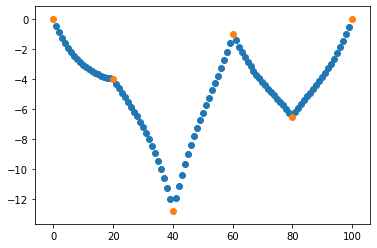

In [6]:
# On utilise la formule du 2) de la théorie

Inv_cov_obs = np.linalg.inv(Cov_obs)
m_v = [-5 for i in range (len(observation_indexes))]
m_z = [-5 for i in range (len(unknown_indexes))]

esp_cond = m_z + np.dot(np.matmul(Cov_obs_inc,(Inv_cov_obs)),(depth - m_v))

plt.scatter(unknown_indexes, esp_cond)
plt.scatter(observation_indexes, depth)

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

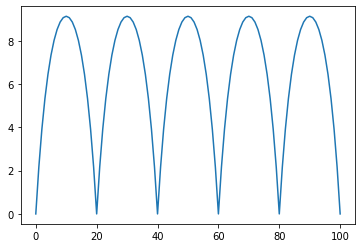

In [7]:
CS_z = Cov_inc - np.matmul(np.matmul(Cov_obs_inc,(Inv_cov_obs)),(Cov_obs_inc.T))
diago = [CS_z[i][i] for i in range(95)]

# Pour rajouter la variance conditionnelle (nulle) des points connus :
var_cond = [(0 if i%20 == 0 else diago[i - (i//20 + 1)]) for i in range (101)]
indexes = [i for i in range (101)]

plt.plot(indexes, var_cond)

Cette allure traduit bien le fait que la profondeur est de moins en moins bien connue à mesure qu'on s'éloigne des points d'observation, et au contraire la variance tend vers 0 lorsque l'on s'approche des points connus.

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

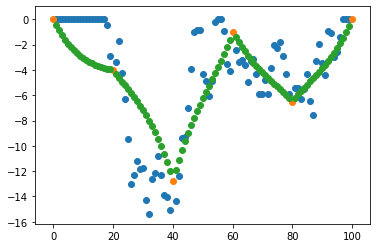

In [8]:
#Du coup j'ai pris l'opposé ici, sans avoir la raison, mais ça marche, la matrice est bien définie positive
R = np.linalg.cholesky(CS_z)
def simulation() :
    Y = np.zeros(95)
    Y_2 = np.zeros(95)
    for i in range(95) :
        U = np.random.uniform()
        V = np.random.uniform()
        Y[i] = np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V) #vecteur gaussien centré, réduit construit selon la méthode de Box-Muller
        Y_2[i] = np.random.randn(1)
    Z = esp_cond + R.dot(Y_2)
    
    
    for k in range(len(Z)) :
        if Z[k]>0:
            Z[k]=0
        
    return Z

Z = simulation()
plt.scatter(unknown_indexes, Z)
plt.scatter(observation_indexes, depth)
plt.scatter(unknown_indexes, esp_cond)

8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [9]:
def longueur_cable(prof, dx) :
    L = 0
    N = len(prof)
    
    for i in range(1,N) :
        L += np.sqrt(dx**2 + (prof[i] - prof[i-1])**2)
    return L

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [18]:
def vecteur_complet(Z) : #Ajoute les points déjà connus (donc non simulés) à un vecteur issu d'une simulation
    return [(depth[i//20] if i%20 == 0 else Z[i - (i//20 + 1)]) for i in range (101)]

def L_simulée(NB) :
    L = []
    V=[]
    for k in range(NB) :
        Z = simulation()
        L.append(longueur_cable(vecteur_complet(Z), Delta))
        V.append((longueur_cable(vecteur_complet(Z), Delta))**2) #je calcule E(X^2) avec 
                                                              # X notre variable aléatoire discrète qui donne la distance
    return L, V

L100, V100 = L_simulée(100)


print(f"L'espérance conditionnelle estimée de la longueur est de {np.round(np.average(L100), 3)}m.")
print(f"La variance conditionnelle estimée de la longueur est de {np.round(np.average(V100)-np.average(L100)**2,3)}m.")

L_bis = longueur_cable(vecteur_complet(esp_cond), dx) #esp_cond est le vecteur des espérances conditionnelles des points inconnus
print(f"alors que la longueur de l'espérance conditionnelle est de {np.round_(L_bis, 3)}m.")


L'espérance conditionnelle estimée de la longueur est de 520.057m.
La variance conditionnelle estimée de la longueur est de 9.682m.
alors que la longueur de l'espérance conditionnelle est de 501.647m.


Cela s'explique par le fait que l'espérance conditionnelle a une allure "lissée", qui s'approche d'une longueur minimale du cable. En réalité, le caractère aléatoire de la surface augmente la longueur moyenne du cable, par des sauts irréguliers entre haut et bas.

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

La moyenne de n longueurs simulées semble tendre vers une valeur proche de M_100 = 520.008


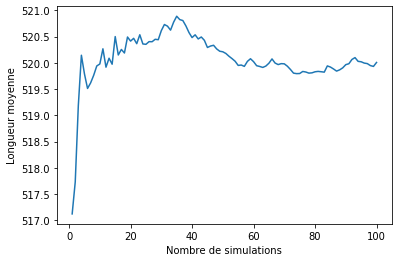

In [19]:
L100 = L_simulée(100)[0]

def affichage_Mn(L, ax = None) :
    NB = len(L)
    
    les_x = [k for k in range(1, NB+1)]
    les_y = [np.average(L[:i]) for i in range(1, NB+1)]
    if ax == None :
        ax = plt.gca()
    ax.set_xlabel("Nombre de simulations")
    ax.set_ylabel("Longueur moyenne")
    ax.plot(les_x, les_y)
    print(f"La moyenne de n longueurs simulées semble tendre vers une valeur proche de M_{NB} = {np.round(les_y[-1], 3)}")
    
affichage_Mn(L100)

11. Représenter l'histogramme des longueurs de câbles générées.

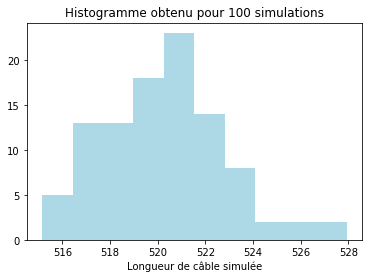

In [20]:
L100 = L_simulée(100)

def histogramme(L, ax = None) :
    NB = len(L)
    num_bins = min(int(np.sqrt(NB)), 100)
    if ax == None :
        ax = plt.gca()
    n, bins, patches = ax.hist(L, num_bins, facecolor='lightblue')
    ax.set_xlabel("Longueur de câble simulée")
    ax.set_title(f"Histogramme obtenu pour {NB} simulations")

histogramme(L100[0])

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

1ère méthode simple : ? 

2ème méthode : on utilise le TCL, comme (Mn-m)*(n)^(1/2) converge en loi vers une loi normale de paramètre (0,sigma2). or on a pas la variance sigma2 de nos longeurs simulées à priori. 
Je l'ai calculé dans la question 9 en assimilant notre simulation à une variable aléatoire discrète avec V(X) = E(X^2)-E(X)^2 ... le truc c'est qu'elle varie de 12 à 18 donc jsuis pas hyper sûr du résultat. 

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

Bienaymé-Techibtchev? 

14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter.

In [13]:
L1 = L_simulée(1000)
L2 = L_simulée(10000)
L3 = L_simulée(20000)
H = [L1, L2, L3]

#100 000 faisait trop long sur mon ordi, j'ai mis 20 000

La moyenne de n longueurs simulées semble tendre vers une valeur proche de M_1000 = 520.346
La moyenne de n longueurs simulées semble tendre vers une valeur proche de M_10000 = 520.318
La moyenne de n longueurs simulées semble tendre vers une valeur proche de M_20000 = 520.324


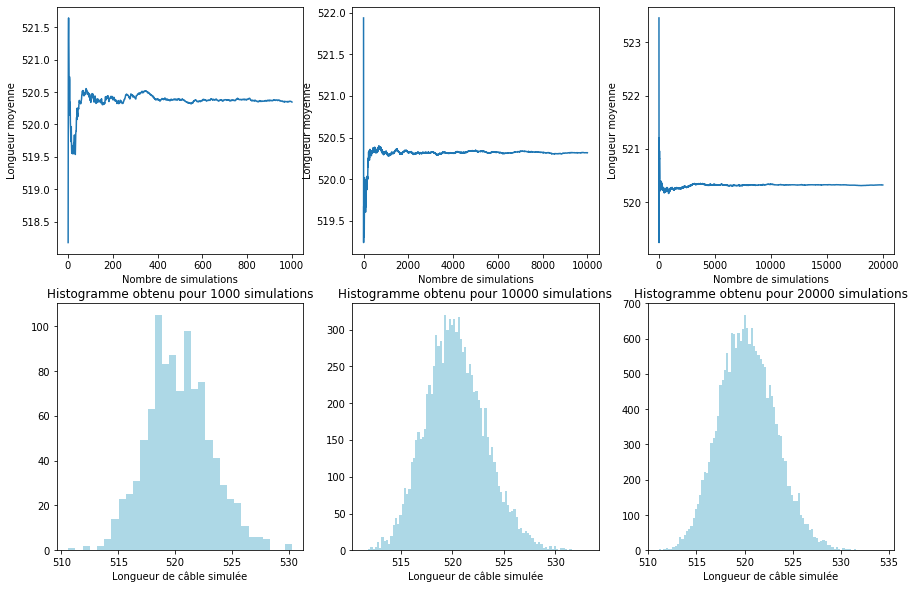

In [21]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i in range(3) :
    affichage_Mn(H[i][0], axes[0, i])
    histogramme(H[i][0], axes[1, i])